# Тема “Обучение без учителя”
## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import pandas as pd
import numpy as np

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [50]:
from sklearn.datasets import load_boston
boston = load_boston()

Создайте датафреймы X и y из этих данных.

In [53]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Постройте диаграмму рассеяния на этих данных.

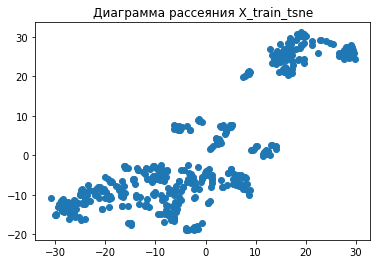

In [57]:
from matplotlib import pyplot as plt
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title("Диаграмма рассеяния X_train_tsne")
plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

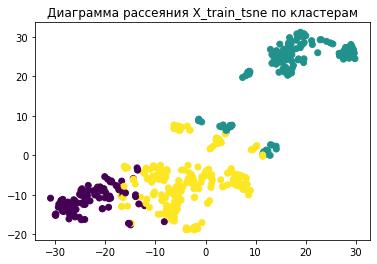

In [58]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.title("Диаграмма рассеяния X_train_tsne по кластерам")
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [55]:
for i in range(3):
    print(f'Кластер {i}')
    print(f'Среднее price:\t{float(y_train[labels_train == i].mean())}')
    print('Среднее CRIM:\t', X_train.loc[labels_train == i, 'CRIM'].mean())
    print('-' * 40)

Кластер 0
Среднее price:	27.788372093023252
Среднее CRIM:	 0.07356558139534886
----------------------------------------
Кластер 1
Среднее price:	16.165354330708666
Среднее CRIM:	 10.797028425196853
----------------------------------------
Кластер 2
Среднее price:	24.958115183246072
Среднее CRIM:	 0.42166020942408367
----------------------------------------


## *Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.


In [62]:
labels_test = kmeans.fit_predict(X_test_scaled)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [63]:
for i in range(3):
    print(f'Кластер {i}')
    print(f'Среднее price:\t{float(y_test[labels_test == i].mean())}')
    print('Среднее CRIM:\t', X_test.loc[labels_test == i, 'CRIM'].mean())
    print('-' * 40)

Кластер 0
Среднее price:	33.871428571428574
Среднее CRIM:	 0.08618571428571427
----------------------------------------
Кластер 1
Среднее price:	21.552830188679245
Среднее CRIM:	 0.25200716981132076
----------------------------------------
Кластер 2
Среднее price:	16.437142857142856
Среднее CRIM:	 10.165531142857143
----------------------------------------
